In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import networkx as nx

In [34]:
#def determinante(G)

V=6

def ideale(A,V):
    return ((A+1)**2)/(A * V)


x=np.linspace(0.5,2,400)
y=ideale(x,V)

A=sp.symbols('A')
yf=((A+1)**2)/(A * V)
ff=sp.diff(yf,A)
x0=sp.solve(ff,A)
print("il punto di minimo è:", x0)
x0= np.repeat(x0[1], 10)
y0=np.linspace(1,12,10)

il punto di minimo è: [-1, 1]


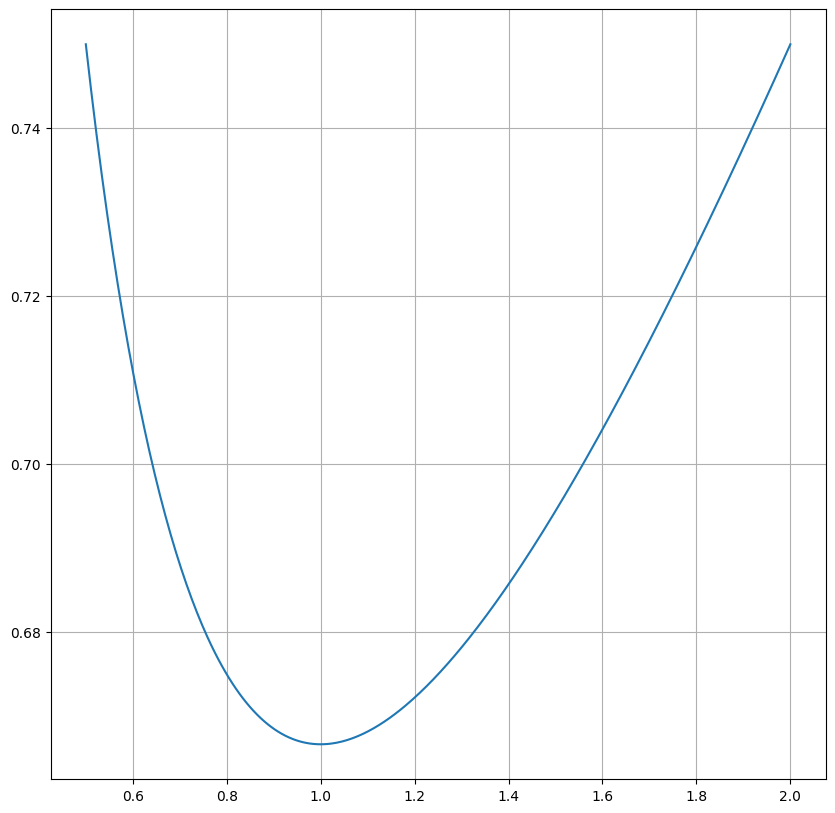

In [35]:
plt.figure(figsize=(10,10))
#plt.hlines(ideale(1,V),xmin=0,xmax=3,colors="orange")
plt.plot(x, y)
#plt.plot(x0,y0)
plt.grid(True)
plt.show()


In [36]:
G0, G1, G2, G3, G4, G5, V = sp.symbols('G0 G1 G2 G3 G4 G5 V')

# Creazione del grafo con conduttanze
circuito = nx.Graph()
conduttanze = {
    ("A", "B"): G1,
    ("A", "C"): G3,
    ("B", "D"): G2,
    ("C", "D"): G4,
    ("D", "E"): G0,
    ("B", "C"): G5     
}

# Aggiunta degli archi al grafo con peso "conductance"
for (n1, n2), G in conduttanze.items():
    circuito.add_edge(n1, n2, conductance=G)

# Definizione dei generatori di tensione
generatori = {
    "A": 22.6,  
    "E": 0   
}

# Troviamo i nodi variabili (quelli che non hanno un generatore associato)
nodi_variabili = [n for n in circuito.nodes if n not in generatori]

# Creazione della matrice simbolica di ammettenza Y
n = len(nodi_variabili)
Y = sp.zeros(n, n)  # Matrice simbolica inizializzata a 0

for i, nodo in enumerate(nodi_variabili):
    somma_ammettenze = 0  # Per il termine diagonale
    
    for vicino in circuito.neighbors(nodo):
        G = circuito[nodo][vicino]['conductance']  # Prendiamo la conduttanza assegnata al ramo
        
        if vicino in nodi_variabili:
            j = nodi_variabili.index(vicino)
            Y[i, j] = -G  # Termini fuori diagonale
        
        somma_ammettenze += G  # Somma delle conduttanze per il termine diagonale
    
    Y[i, i] = somma_ammettenze  # Termine diagonale

# Stampiamo la matrice simbolica di ammettenza
print("Matrice di ammettenza Y:")
sp.pprint(Y)

# Calcoliamo il determinante simbolico di Y
det_Y = Y.det()
print("\nDeterminante simbolico della matrice di ammettenza:")
print(det_Y)


Matrice di ammettenza Y:
⎡G₁ + G₂ + G₅      -G₅           -G₂     ⎤
⎢                                        ⎥
⎢    -G₅       G₃ + G₄ + G₅      -G₄     ⎥
⎢                                        ⎥
⎣    -G₂           -G₄       G₀ + G₂ + G₄⎦

Determinante simbolico della matrice di ammettenza:
G0*G1*G3 + G0*G1*G4 + G0*G1*G5 + G0*G2*G3 + G0*G2*G4 + G0*G2*G5 + G0*G3*G5 + G0*G4*G5 + G1*G2*G3 + G1*G2*G4 + G1*G2*G5 + G1*G3*G4 + G1*G4*G5 + G2*G3*G4 + G2*G3*G5 + G3*G4*G5


In [37]:
def U_definitivo(det_Y,V,G0,G1,G2,G3,G4,G5):
    return ((G0 * V) * (G2 * G3 - G1 * G4))/(det_Y)



U=U_definitivo(det_Y,V,G0,G1,G2,G3,G4,G5)
#print(U)

S_def= sp.diff(U,G4) * (-1) * (G4)**2
print(S_def)


print(S_def)


G4**2*(G0*G1*V/(G0*G1*G3 + G0*G1*G4 + G0*G1*G5 + G0*G2*G3 + G0*G2*G4 + G0*G2*G5 + G0*G3*G5 + G0*G4*G5 + G1*G2*G3 + G1*G2*G4 + G1*G2*G5 + G1*G3*G4 + G1*G4*G5 + G2*G3*G4 + G2*G3*G5 + G3*G4*G5) - G0*V*(-G1*G4 + G2*G3)*(-G0*G1 - G0*G2 - G0*G5 - G1*G2 - G1*G3 - G1*G5 - G2*G3 - G3*G5)/(G0*G1*G3 + G0*G1*G4 + G0*G1*G5 + G0*G2*G3 + G0*G2*G4 + G0*G2*G5 + G0*G3*G5 + G0*G4*G5 + G1*G2*G3 + G1*G2*G4 + G1*G2*G5 + G1*G3*G4 + G1*G4*G5 + G2*G3*G4 + G2*G3*G5 + G3*G4*G5)**2)
G4**2*(G0*G1*V/(G0*G1*G3 + G0*G1*G4 + G0*G1*G5 + G0*G2*G3 + G0*G2*G4 + G0*G2*G5 + G0*G3*G5 + G0*G4*G5 + G1*G2*G3 + G1*G2*G4 + G1*G2*G5 + G1*G3*G4 + G1*G4*G5 + G2*G3*G4 + G2*G3*G5 + G3*G4*G5) - G0*V*(-G1*G4 + G2*G3)*(-G0*G1 - G0*G2 - G0*G5 - G1*G2 - G1*G3 - G1*G5 - G2*G3 - G3*G5)/(G0*G1*G3 + G0*G1*G4 + G0*G1*G5 + G0*G2*G3 + G0*G2*G4 + G0*G2*G5 + G0*G3*G5 + G0*G4*G5 + G1*G2*G3 + G1*G2*G4 + G1*G2*G5 + G1*G3*G4 + G1*G4*G5 + G2*G3*G4 + G2*G3*G5 + G3*G4*G5)**2)


10.0
1/(A*G3*(-0.597607180847885*(-10.02*A*G1 - 0.10011002)*(0.01*A*G1 - 0.01*A*G3)/(A**2*G1*G3 + 0.00999101996007984*A*G1 + 0.00999101996007984*A*G3 + 9.98203592814371e-5)**2 + 0.6/(10.02*A**2*G1*G3 + 0.10011002*A*G1 + 0.10011002*A*G3 + 0.0010002)))
100.0*(0.00167*A**2 + 0.00333700066666667*A + 0.001667)/A
il punto di minimo è [-0.999101392659610, 0.999101392659610]
2.0
1/(A*G3*(-2.94088814822076*(-2.02*A*G1 - 0.02010202)*(0.01*A*G1 - 0.01*A*G3)/(A**2*G1*G3 + 0.00995149504950495*A*G1 + 0.00995149504950495*A*G3 + 9.9029702970297e-5)**2 + 0.12/(2.02*A**2*G1*G3 + 0.02010202*A*G1 + 0.02010202*A*G3 + 0.00020004)))
100.0*(0.00168333333333333*A**2 + 0.00335033666666667*A + 0.001667)/A
il punto di minimo è [-0.995136688954320, 0.995136688954320]
1.0
1/(A*G3*(-5.76701268742791*(-1.02*A*G1 - 0.01010102)*(0.01*A*G1 - 0.01*A*G3)/(A**2*G1*G3 + 0.00990296078431373*A*G1 + 0.00990296078431373*A*G3 + 9.80588235294118e-5)**2 + 0.06/(1.02*A**2*G1*G3 + 0.01010102*A*G1 + 0.01010102*A*G3 + 0.00010002)))
10

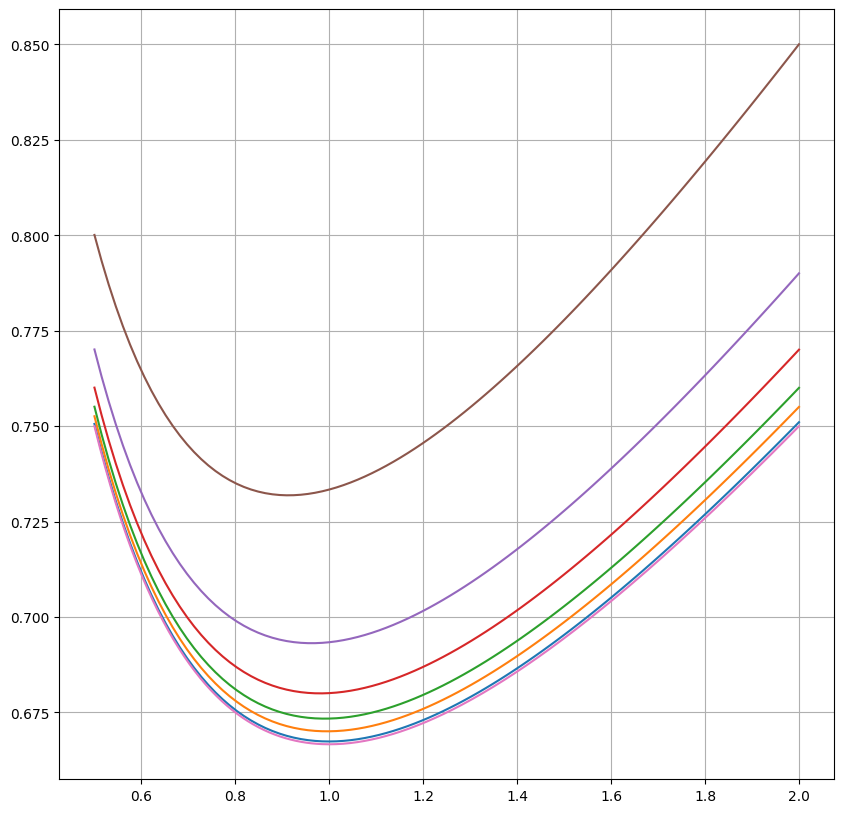

In [ ]:
#esercizio in cui mostriamo il motivo per cui scegliamo r1=r2, grafici dell'errore su R4
r0=[0.1,0.5,1,2,4,10]
plt.figure(figsize=(10,10))
for r in r0:
    A= sp.symbols('A')
    valori = {
    "G0": 1/r,
    "G1": 1/100,
    "G2": A * G1,
    "G3": 1/100,
    "G4": A * G3,
    "G5": 1/10**6,
    "V": 6}
    print(valori["G0"])

    err_rel= G4/S_def
   

    err_num=err_rel.subs(valori)

    #print(err_num)
    err_num=err_num.subs(valori)
    #print(err_num)
    ff=sp.diff(err_num,A)
    x0=sp.solve(ff,A)
    print("il punto di minimo è",x0)
    err_func = sp.lambdify(A, err_num, 'numpy')

    A=np.linspace(0.5,2,100)
    y_reale=err_func(A)
    plt.plot(A, y_reale)
plt.plot(x,y)
plt.grid(True)
plt.show()